In [1]:
import pandas as pd
import pprint as pp

In [2]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [9]:
from sqlalchemy import create_engine
table_name = 'Data_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [10]:
df = pd.read_sql_table(table_name, engine)

2020-12-16 15:59:27,328 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-16 15:59:27,329 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:59:27,330 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-16 15:59:27,331 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:59:27,332 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-16 15:59:27,332 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:59:27,334 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-16 15:59:27,335 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:59:27,336 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Data_set")
2020-12-16 15:59:27,337 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 15:59:27,339 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION A

In [11]:
df = df.rename(columns={"class": "label"})

In [12]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [49]:
train = df.sample(frac=0.75,random_state=100) #random state is a seed value
test = df.drop(train.index)

In [50]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [51]:
labels = model.predict(test.abstract)

In [52]:
pp.pprint(labels)

array(['2', '12', '2', '15', '2', '15', '2', '15', '12', '2', '15', '15',
       '2', '12', '12', '15', '15', '2', '12', '2', '12', '12', '2', '15',
       '2', '15', '2', '12', '2', '12', '2', '12', '2', '12', '2', '15',
       '2', '15', '15', '12', '2', '2', '2', '2', '2', '2', '12', '2',
       '15', '2', '12', '15', '2', '12', '12', '2', '2', '2', '2', '2',
       '15', '2', '12', '15', '2', '2', '2', '15', '15', '2', '12', '2',
       '2', '15', '15', '2', '15', '12', '15', '15', '15', '15', '2',
       '15', '2', '15', '15', '15', '12', '2', '15', '15', '15', '12',
       '15', '15', '12', '15', '2', '15', '2', '2', '15', '2', '12', '2',
       '15', '2', '15', '15', '12', '2', '15', '12', '15', '2', '2', '2',
       '12', '2', '2', '15', '2', '12', '2', '2', '2', '15', '15', '12',
       '2', '2', '12', '2', '15', '15', '15', '2', '12', '2', '12', '12',
       '12', '2', '15', '2', '15', '15', '12', '2', '15', '2', '2', '2',
       '2', '15', '15', '12', '2', '15', '12', '12', 

In [53]:
test.label

0       3
2       9
4       3
11     14
13      2
       ..
735    15
738    13
745     2
749    14
750     6
Name: label, Length: 188, dtype: object

In [54]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels)

In [55]:
pp.pprint(mat)

array([[ 0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  7,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  2,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  9,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 11,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  6,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  1,  0

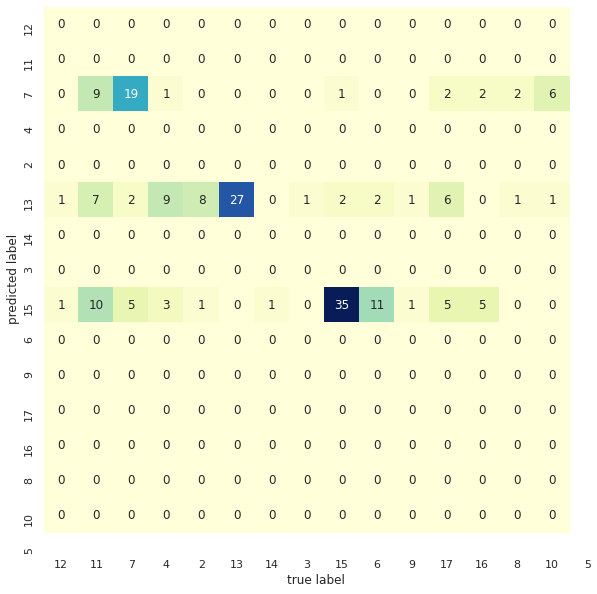

In [56]:
sns.set(style="white", color_codes=True)
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.label.unique(), yticklabels=train.label.unique(),cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label');

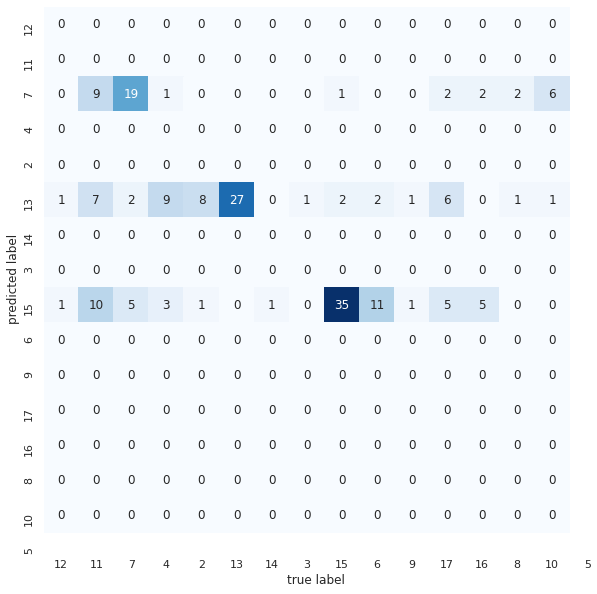

In [58]:
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.label.unique(), yticklabels=train.label.unique(),cmap="Blues")

plt.xlabel('true label')
plt.ylabel('predicted label');